# Lab Assignment 2

## Lorenzo Stigliano, s1725018



## Task 1

**(a)** First, we define the `my_euler_phi` function, which computes Euler's $\phi(n)$:

In [1]:
def my_euler_phi(n):
    count = 0
    for k in range(1,n+1):
        gcd = 0
        for j in range(1,k+1):
            if((k % j == 0) and (n % j == 0)): 
                gcd = j
        if gcd == 1:
            count+=1
    return count 

The function my_euler_phi(n) takes in n and checks for all valus of k in the range to see if the gcd is 1 for both k and n. If thats the case then it adds 1 to the total count and then return the count.

**(b)** Below I have made 2 list that use my_euler_phi and euler_phi, we can see that they have the same values since when we equate both lists it returns true this means that all the elements in the lists are the same. Furthermore I have used the len() python function to show that both lists are of length 100 which means they both have 100 elements in them.

The values using my function: 

In [2]:
my_list_values = [my_euler_phi(n) for n in [1..100]]

In [3]:
len(my_list_values)

100

In [4]:
print(my_list_values)

[1, 1, 2, 2, 4, 2, 6, 4, 6, 4, 10, 4, 12, 6, 8, 8, 16, 6, 18, 8, 12, 10, 22, 8, 20, 12, 18, 12, 28, 8, 30, 16, 20, 16, 24, 12, 36, 18, 24, 16, 40, 12, 42, 20, 24, 22, 46, 16, 42, 20, 32, 24, 52, 18, 40, 24, 36, 28, 58, 16, 60, 30, 36, 32, 48, 20, 66, 32, 44, 24, 70, 24, 72, 36, 40, 36, 60, 24, 78, 32, 54, 40, 82, 24, 64, 42, 56, 40, 88, 24, 72, 44, 60, 46, 72, 32, 96, 42, 60, 40]


The values using my in built function: 

In [5]:
sage_phi_values = [euler_phi(n) for n in [1..100]]

In [6]:
len(sage_phi_values)

100

In [7]:
print(sage_phi_values)

[1, 1, 2, 2, 4, 2, 6, 4, 6, 4, 10, 4, 12, 6, 8, 8, 16, 6, 18, 8, 12, 10, 22, 8, 20, 12, 18, 12, 28, 8, 30, 16, 20, 16, 24, 12, 36, 18, 24, 16, 40, 12, 42, 20, 24, 22, 46, 16, 42, 20, 32, 24, 52, 18, 40, 24, 36, 28, 58, 16, 60, 30, 36, 32, 48, 20, 66, 32, 44, 24, 70, 24, 72, 36, 40, 36, 60, 24, 78, 32, 54, 40, 82, 24, 64, 42, 56, 40, 88, 24, 72, 44, 60, 46, 72, 32, 96, 42, 60, 40]


Comparing both of the lists:

In [8]:
sage_phi_values == my_list_values

True

**(c)** The most efficeint approach was using the sage in-built. Which was considerably quicker than my function. 267 micro seconds vs 47.3 ms per loop for the function I built.

In [9]:
%timeit sage_phi_values = [euler_phi(n) for n in [1..100]]

1000 loops, best of 3: 200 µs per loop


In [10]:
%timeit my_list_values = [my_euler_phi(n) for n in [1..100]]

10 loops, best of 3: 39.7 ms per loop


Creating the data variable to capture a list of [n, euler_phi(n)] for each value of n from 1 to 100

In [11]:
data = [[n, euler_phi(n)] for n in [1..100]]

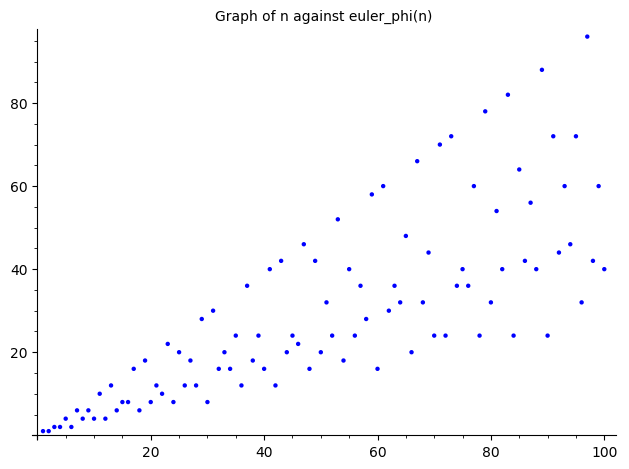

In [12]:
my_plot = list_plot(data)
my_plot.show(title='Graph of n against euler_phi(n)')

## Task 2

**(a)** First, we define the `find_order_of` function, finds the order of g given a base of prime p.

In [13]:
def find_order_of(g,p):
    gpwr = mod(1, p)
    for i in range(1,p):
        gpwr = gpwr*g
        if(gpwr == 1):
            return i

**(b)** We define the `list_generators` function, takes in a prime p and returns a list of all elements which generate the group.
Checks if the order of the elements in the range are euqal to p-1 since if that is the case then they generate the whole group and thus are generators.

In [14]:
def list_generators(p):
    list=[]
    for i in range(1,p):
        if find_order_of(i,p) == p-1:
            list.append(i)
    return list

In [15]:
list_generators(17)

[3, 5, 6, 7, 10, 11, 12, 14]

**(c)** First I get all the primes between 1 and 100 and save them as a list in primes variable. Then I make a list comprehension primes_euler which gets every prime and calulates the value `of euler_phi` for each prime.

In [16]:
primes = list(set([next_prime(x) for x in [1..100]][0:90]))

In [17]:
print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [18]:
primes_euler = [[i,euler_phi(i)] for i in primes]

In [19]:
print(primes_euler)

[[2, 1], [3, 2], [5, 4], [7, 6], [11, 10], [13, 12], [17, 16], [19, 18], [23, 22], [29, 28], [31, 30], [37, 36], [41, 40], [43, 42], [47, 46], [53, 52], [59, 58], [61, 60], [67, 66], [71, 70], [73, 72], [79, 78], [83, 82], [89, 88], [97, 96]]


Finally I show the claim by showing that the number of generators is equal to p-1 hence for each prime I take one away and compare it to the number of genertaotrs for that prime, the all() function ensures that all the conditions in the list are True. Since it returns True this means that all the elements in the list are true and hence the claim is true for all primes between 1 and 100.

In [20]:
all([x[0]-1 == x[1] for x in primes_euler])

True